<a href="https://colab.research.google.com/github/JeongUgSeo/Aiffel_Exploration3/blob/main/Exploration3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [5]:
# 함수화 하기

def cat_sticker(picture_path, sticker_path):
    #영상과 이미지 로드하기

    my_image_path = picture_path
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.resize(img_bgr, (360, 640))    # 640x360의 크기로 Resize / 이거 잘못됨 360x640으로 해야됨 세로 형태의 사진은
    img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
    plt.imshow(img_bgr)
    #plt.show()

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    img_show2 = img_rgb.copy()
    plt.show()

    sticker_path = sticker_path
    img_sticker = cv2.imread(sticker_path)

    cap = img_rgb
    sticher_img = img_sticker

    detector = dlib.get_frontal_face_detector()
    dets = detector(img_rgb)
    print("number of faces detected:", len(dets))

    for det in dets:
      x1 = det.left()
      y1 = det.top() + 50
      x2 = det.right()
      y2 = det.bottom() + 50

      cv2.rectangle(img_rgb, pt1=(x1,y1), pt2=(x2,y2), color=(0,255,0), thickness=2)

    plt.imshow(img_rgb)
    plt.show()

    overlay_img = img_sticker.copy()

    #스티커를 얼굴 사이즈에 맞춰서 크기 조정을 해준다. 
    overlay_img = cv2.resize(overlay_img, dsize=(x2 - x1, y2 - y1))

    #스티커 합성하는 코드
    overlay_alpha = overlay_img[:, :, :] / 255.0
    background_alpha = 1.0 - overlay_alpha

    img_rgb[y1:y2, x1:x2] = overlay_alpha * overlay_img[:, :, :3] + background_alpha * img_rgb[y1:y2, x1:x2]

    plt.imshow(img_rgb)
    plt.show()

    img_show2[y1:y2, x1:x2] = overlay_alpha * overlay_img[:, :, :3] + background_alpha * img_rgb[y1:y2, x1:x2]

    plt.imshow(img_show2)
    plt.show()

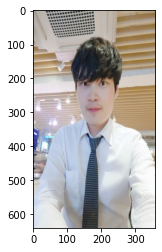

number of faces detected: 1


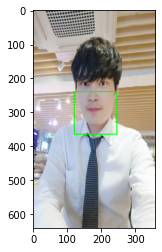

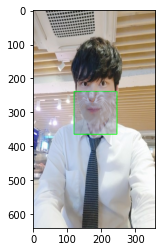

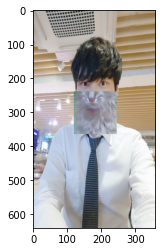

In [6]:
picture_path = '/content/프로필사진-서정욱.jpg'
sticker_path = '/content/고양이 수염.jpg'
cat_sticker(picture_path, sticker_path)

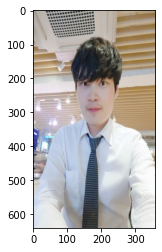

number of faces detected: 1


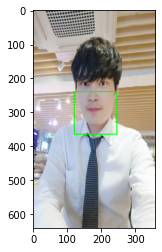

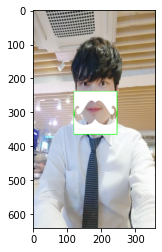

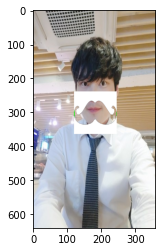

In [7]:
picture_path = '/content/프로필사진-서정욱.jpg'
sticker_path = '/content/수염 이미지.png'
cat_sticker(picture_path, sticker_path)

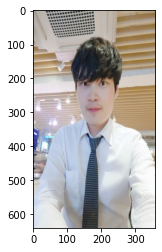

number of faces detected: 1


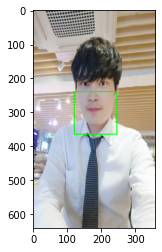

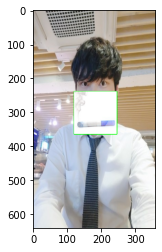

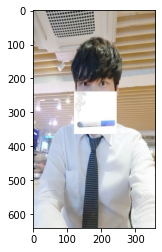

In [8]:
picture_path = '/content/프로필사진-서정욱.jpg'
sticker_path = '/content/담배 이미지.jpg'
cat_sticker(picture_path, sticker_path)

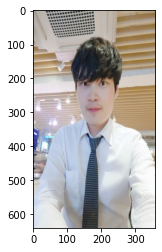

number of faces detected: 1


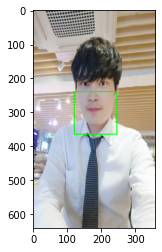

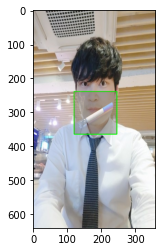

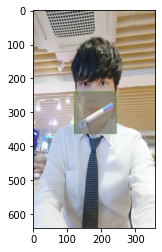

In [9]:
picture_path = '/content/프로필사진-서정욱.jpg'
sticker_path = '/content/담배 이미지2.jpg'
cat_sticker(picture_path, sticker_path)

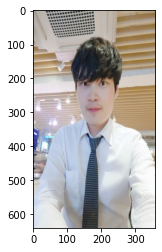

number of faces detected: 1


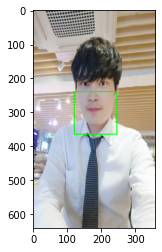

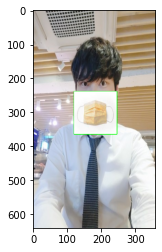

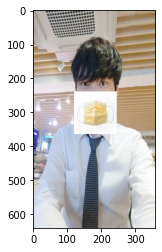

In [10]:
picture_path = '/content/프로필사진-서정욱.jpg'
sticker_path = '/content/마스크 이미지.jpg'
cat_sticker(picture_path, sticker_path)